# Kaggle Survey 2021: An analysis of Kaggle community

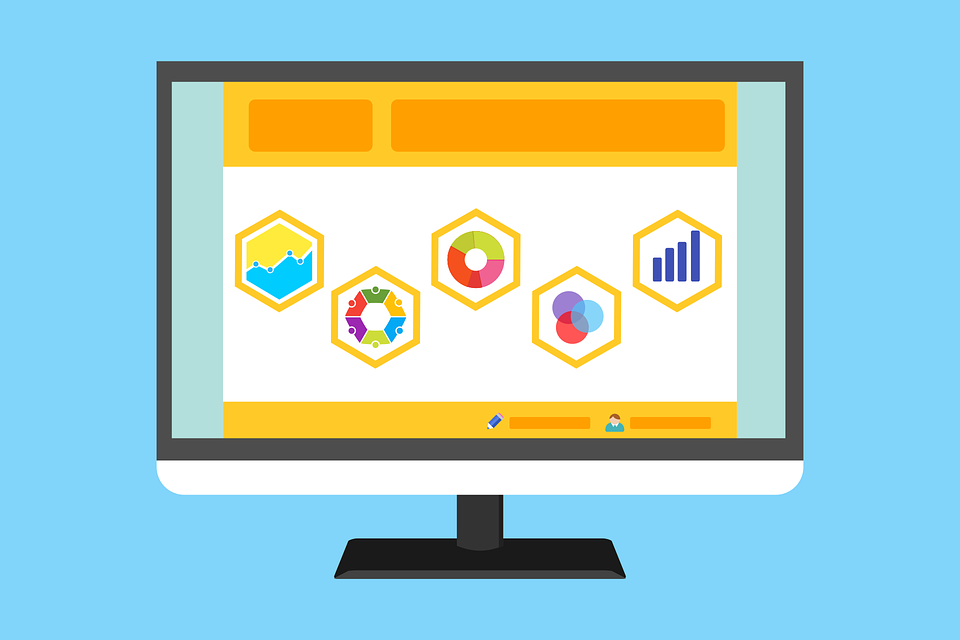]

Kaggle is a platform, specialised in Data Science and Machine Learning competitions. It purposes some projects and micro-courses to obtain skills in differents fields of Data Science.
Each year, Kaggle realizes a survey in order to better know its community. This year, the survey was realised from January to April 2021. More than 25,000 participants have responsed. In the following notebook, data was presented in order to produce a large panorama of the community and maybe, this may help us to understand how Machine Learning & Data Science are lived around the world. 

In [ ]:
# importing libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# loading dataset
data = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv", low_memory=False)
data.drop(index=0, axis=1, inplace=True)
data.head()

# Who are the participants ?

In [ ]:
demo = data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
demo.columns = ["Age", "Gender", "Country", "Education", "Current role"]

In [ ]:
colors = ['gainsboro'] * 11
colors[2] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=["18-21 years", "22-24 years", "25-29 years", "30-34 years", "35-39 years",
                                "40-44 years", "45-49 years", "50-54 years", "55-59 years", "60-69 years",
                                "70+ years"],
                             y=[4901, 4694, 4931, 3441, 2504, 1890, 1375, 964, 592, 553, 128],
                             text=["18.9%", "18.1%", "19%", "13.2%", "9.6%", "7.3%", "5.3%",
                                   "3.7%", "2.3%", "2.1%", "0.5%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(xaxis={'categoryorder':'category ascending'},
                  template="plotly_white",
                  title="Kaggle Survey 2021: Age of the participants")
fig.show()

More than the half of the participants have less than 30 years. 

In [ ]:
x = demo["Gender"].unique().tolist()
y = demo["Gender"].value_counts()

fig = px.pie(demo,
             x,
             y,
             hole=.6,
             title="Kaggle Survey 2021: Distribution of gender")

# Customize aspect
fig.update_traces(textinfo='percent')
fig.show()

Most of the participants are men. These results show that Data Sciences & Machine Learning are considered as "men fields". This idea is already seen in this other IT domains. 

*Coordonates comming from : https://www.kaggle.com/sergedanson/countries-geolocation*

In [ ]:
coord = pd.read_csv("../input/countries-geolocation/countries_geolocation.csv",
                   header=None)
coord.columns=['Abbr.', 'Latitude', 'Longitude', 'Country']
coord.head()

In [ ]:
countries = demo[['Country']]
countries = pd.merge(countries, coord, left_on="Country", right_on='Country')

In [ ]:
x = countries["Country"].unique()
y = round(countries["Country"].value_counts(normalize=True) * 100, 1)
lat = countries["Latitude"].unique()
lon = countries["Longitude"].unique()

fig = px.scatter_geo(countries,
                     lat=lat,
                     lon=lon,
                     size=y,
                     color=x,
                     hover_name=x,
                     projection="natural earth")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Kaggle Survey 2021: Localisation of the participants")
fig.show()

The most participants live in India. We can observe a cluster of participants in Europe and another one in Africa. 

In [ ]:
colors = ['gainsboro'] * 7
colors[0] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=[10132, 9907, 2795, 1735, 627, 417, 360],
                             y=['Master\'s degree', "Bachelor's degree", "Doctoral degree", "College/University without earning diploma",
                                'Prefer not to answer', "No formal education past high school", "Professional doctorate"],
                             text=["39%", "38.1%", "10.8%", "6.7%", "2.4%", "1.6%", "1.4%"],
                             textposition="auto",
                             orientation="h",
                             marker_color=colors)])

fig.update_layout(xaxis={'categoryorder':'category ascending'})
fig.update_layout(title="Kaggle Survey 2021: Level of education", template="plotly_white",)

fig.show()

Master's degree seems to be the diploma the more represented. Bachelor's degree is the second. Almost 80% of our participants are graduated from universities or colleges.

In [ ]:
colors = ['gainsboro'] * 15
colors[0] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=[6804, 3616, 2449, 2301, 1538, 1499, 968, 849, 668, 319, 313, 171, 99, 1986, 2393],
                             y=["Student", "Data Scientist", "Software Engineer", "Data Analyst", "Research Scientist",
                                "Machine Learning Engineer", "Business Analyst", "Program/Project Manager", "Data Engineer",
                                "Product Manager", "Statistician", "DBA/Database Engineer", "Developper Relations/Advocacy",
                                "Currently not employed", "Other"],
                             text=["26.2%", "13.9%", "9.4%", "8.9%", "5.9%", "5.8%", "3.7%", "3.3%",
                                   "2.6%", "1.2%", "0.7%", "0.4%", "0.2%", "7.6%", "9.2%"],
                             textposition="auto",
                             orientation="h",
                             marker_color=colors)])
fig.update_layout(xaxis={'categoryorder':'category ascending'})
fig.update_layout(title="Kaggle Survey 2021: Current job of the participants", template="plotly_white")
fig.show()

Finally a great part of our participants are students. Data Scientist are the most represented jobs in our samples. 

**Conclusion: Describe me a Kaggler**

According our sample, a Kaggler is a man between 18 and 29 years. He have a great chance to live in India or in Europe. He is a student in undergraduate diploma. 

*What's the problem ?*

Women only represent approx. 20% of the sample. It's not bad but it can be better. It can be interested to put forward some inspirant women of the community :D

# What language can you write ?

Second part of our survey is about programming language experience of the Kaggle's community. Let dive into their programming habits. 

In [ ]:
q7 = data[['Q7_Part_1',
      'Q7_Part_2',
      'Q7_Part_3',
      'Q7_Part_4',
      'Q7_Part_5',
      'Q7_Part_6',
      'Q7_Part_7',
      'Q7_Part_8',
      'Q7_Part_9',
      'Q7_Part_10',
      'Q7_Part_11',
      'Q7_Part_12',
      'Q7_OTHER']]
q7.columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']

In [ ]:
q7.append(q7.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 13
colors[0] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=[21860, 5334, 10756, 4709, 5535, 4769, 4332, 305, 242, 2216, 2935, 319, 2575],
                             y=['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other'],
                             text=["33.1%", "8.1%", "16.3%", "7.1%", "8.4%", "7.2%", "6.7%", "0.04%", "0.03%", "3.3%", "0.04%", "0.03%", "7%"],
                             textposition="auto",
                             marker_color=colors,
                             orientation='h')])

fig.update_layout(title="Kaggle Survey 2021: Most Coding Language",
                  template="plotly_white")
fig.show()

Python is the most commun programming language following by SQL and C++. Is it really surprising ? The answer is no. Most of the libraries in Data Science and Machine Learning purposes are in Python. SQL is a language used for consulting database. 

In [ ]:
colors = ['gainsboro'] * 11
colors[2] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=['Never written code', "< 1 year", '1-3 years', "3-5 years",
                                "5-10 years", "10-20 years", "20+ years"],
                             y=[1032, 5881, 7874, 4061, 3099, 2166, 1860],
                             text=["4.0%", "22.6%", "30.3%", "15.6%", "11.9%", "8.3%", "7.2%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Experience with programmation/writing code",
                  template="plotly_white")
fig.show()

Most of the participants have a little experience in writing code. This result is related to the population's age which is  young (less than 30 y.o.).

In [ ]:
colors = ['gainsboro'] * 13
colors[0] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=[20213, 1445, 1338, 440, 437, 242, 215, 137, 133, 38, 15, 176, 1144],
                             y=["Python", "R", "SQL", "C", "C++", "Java", "Matlab",
                                "Julia", "Javascript", "Bash", "Swoft", "Other", "None"],
                             text=["77.8%", "5.6%", "5.2%","1.7%", "1.7%", '0.9%', '0.8%',
                                   '0.5%', '0.5%', '0.1%', '0.1%', '0.7%',"4.4%"],
                             textposition="auto",
                             marker_color=colors,
                             orientation="h")])
fig.update_layout(title="Kaggle Survey 2021: Beginner Friendly Language",
                  template="plotly_white")
fig.show()

It was not a surprise but participants think that Python is the most friendly in order to learn Data Science and Machine Learning. 

**Conclusion:**

This snake is the leader in the programming language preference of our participants. We can observe that our participants have a few experience (1-3 years) in programming language. This result may be correlated with the age of the Kaggle community. 

# Show me what you use & I tell you what you're doing

In [ ]:
q9 = data[['Q9_Part_1',
           'Q9_Part_2',
           'Q9_Part_3',
           'Q9_Part_4',
           'Q9_Part_5',
           'Q9_Part_6',
           'Q9_Part_7',
           'Q9_Part_8',
           'Q9_Part_9',
           'Q9_Part_10',
           'Q9_Part_11',
           'Q9_Part_12',
           'Q9_OTHER']]
q9.columns = ['JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code', 'PyCharm', 'Spyder',
       'Notepad++', 'Sublime Text', 'Vim/Emacs', 'Matlab', 'Jupyter Notebook', 'None', 'Other']

In [ ]:
q9.append(q9.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 13
colors[10] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=[5488, 4771, 4110, 10040, 7468, 3794, 3927, 2839, 1646, 2203, 16233, 526, 1491],
                             y=['JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code', 'PyCharm', 'Spyder',
                                'Notepad++', 'Sublime Text', 'Vim/Emacs', 'Matlab', 'Jupyter Notebook', 'None', 'Other'],
                             text=["8.5%", "7.4%", "6.4%", "15.5%", "11.6%", 
                                   "5.8%", "6.1%", "4.3%", "2.5%", "3.4%", "25.1%", "0.8%", "2.3%"],
                             textposition="auto",
                             marker_color=colors,
                             orientation="h")])

fig.update_layout(title="Kaggle Survey 2021: Most used integrated development environment",
                  template="plotly_white")
fig.show()

In [ ]:
q10 = data[['Q10_Part_1',
           'Q10_Part_2',
           'Q10_Part_3',
           'Q10_Part_4',
           'Q10_Part_5',
           'Q10_Part_6',
           'Q10_Part_7',
           'Q10_Part_8',
           'Q10_Part_9',
           'Q10_Part_10',
           'Q10_Part_11',
           'Q10_Part_12',
           'Q10_Part_13',
           'Q10_Part_14',
           'Q10_Part_15',
           'Q10_Part_16',
           'Q10_OTHER']]
q10.columns = ['Kaggle Notebooks', 'Colab Notebooks', 'Azure Notebooks', 'Paperspace/Gradient', 'Binder/JupyterHub',
               'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio Notebooks', 'Amazon EMR Notebooks',
               'Google Cloud Notebooks (AI Platform/Vertex AI)', 'Google Cloud Datalab', 'Databricks Collaborative Notebooks',
               'Zeppelin/Zeppl Notebooks', 'Deepnote Notebooks', 'Observable Notebooks', 'None', 'Other']

In [ ]:
q10.append(q10.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 17
colors[1] = 'cornflowerblue' 

fig = go.Figure(data=[go.Bar(y=['Kaggle Notebooks', 'Colab Notebooks', 'Azure Notebooks', 'Paperspace/Gradient', 'Binder/JupyterHub',
                                'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio Notebooks', 'Amazon EMR Notebooks',
                                'Google Cloud Notebooks (AI Platform/Vertex AI)', 'Google Cloud Datalab', 'Databricks Collaborative Notebooks',
                                'Zeppelin/Zeppl Notebooks', 'Deepnote Notebooks', 'Observable Notebooks', 'None', 'Other'],
                             x=[9507, 9792, 1062, 209, 1770, 175, 1067, 753, 348, 2051, 1794, 590, 251, 260, 147, 7174, 737],
                             text=["25.2%", "25.9%", "2.8%", "0.05%", "4.7%", "0.04%", "2.8%", "1.9%", 
                                   "0.09%", "5.4%", "4.7%", "1.6%", "0.06%", "0.07%", "0.03%", "19%", "1.9%"],
                             textposition="auto",
                             marker_color=colors,
                             orientation="h")])
fig.update_layout(title="Kaggle Survey 2021: Most used hosted notebooks products",
                  template="plotly_white")
fig.show()

In [ ]:
q12 = data[['Q12_Part_1',
           'Q12_Part_2',
           'Q12_Part_3',
           'Q12_Part_4',
           'Q12_Part_5',
           'Q12_OTHER']]
q12.columns = ['NVIDIA GPU', 'Google Cloud TPU',
               'AWS Trainium Chips', 'AWS Inferentia Chips',
               'None', 'Other']

In [ ]:
q12.append(q12.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 6
colors[4] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=['NVIDIA GPU', 'Google Cloud TPU','AWS Trainium Chips', 'AWS Inferentia Chips',
                                'None', 'Other'],
                             y=[8036, 3451, 414, 416, 13234, 867],
                             text=["30.4%", "13.1%", "1.6%", "1.6%", "50.1%", "3.3%"],
                             textposition="auto",
                             marker_color=colors)])
# Customize aspect
fig.update_layout(title="Kaggle Survey 2021: Specific hardware used",
                  template="plotly_white")
fig.show()

In [ ]:
colors = ['gainsboro'] * 6
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=['Laptop', "Personal Computer/Desktop", "Cloud Computing Platform (AWS, Azure, GCP)", "Deep Learning Workstation",
                                "None", "Other"],
                             y= [16231, 4916, 2328, 814, 259, 172],
                             text=["65.7%", "19.9%", "9.4%", "3.3%", "1.0%", "0.7%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Most Used Computing Platform",
                  template="plotly_white")
fig.show()

In [ ]:
colors = ['gainsboro'] * 5
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=['Never', 'Once', "2-5 times", "6-25 times", "More than 25 times"],
                             y=[16457, 2982, 3405, 947, 612],
                             text=["67.4%", "12.2%", "14.0%", "3.9%", "2.5%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Using TPU",
                  template="plotly_white")
fig.show()

# What's your habits ?

In [ ]:
colors = ['gainsboro'] * 9
colors[1] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=["Do not use ML", "Under 1 year", "1-2 years", "2-3 years",
                                "3-4 years", "4-5 years", "5-10 years", "10-20 years", "20 or more years"],
                             y=[3389, 9163, 4675, 2305, 1171, 945, 1033, 362, 211],
                             text=["16.4%", "38.6%", "19.7%", "9.7%", "4.9%", "4.3%", "4.0%", "1.5%", "0.9%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Experience with Machine Learning Methods",
                  template="plotly_white")
fig.show()

In [ ]:
q14 = data[['Q14_Part_1',
           'Q14_Part_2',
           'Q14_Part_3',
           'Q14_Part_4',
           'Q14_Part_5',
           'Q14_Part_6',
           'Q14_Part_7',
           'Q14_Part_8',
           'Q14_Part_9',
           'Q14_Part_10',
           'Q14_Part_11',
           'Q14_OTHER']]
q14.columns = ["Matplotlib", 'Seaborn', "Plotly/Plotly Express", 'Ggplot/ggplot2',
               'Shiny', 'D3.js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet/Folium',
               'None', 'Other']

In [ ]:
q14.append(q14.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 12
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=["Matplotlib", 'Seaborn', "Plotly/Plotly Express", 'Ggplot/ggplot2',
                                'Shiny', 'D3.js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet/Folium',
                                'None', 'Other'],
                             y=[17595, 12586, 5778, 5100, 1332, 978, 309, 1050, 1148, 716, 3479, 776],
                             text=["34.6%", "24.8%", "11.4%", "10%", "2.6%", "1.9%", "0.06%", "2.1%", "2.3%", "1.4%", "6.8%", "1.5%"],
                             textposition="auto",
                             marker_color=colors)])
# Customize aspect
fig.update_layout(title="Kaggle Survey 2021: Most used data visualisation libraries/tools",
                  template="plotly_white")
fig.show()

In [ ]:
q16 = data[['Q16_Part_1',
           'Q16_Part_2',
           'Q16_Part_3',
           'Q16_Part_4',
           'Q16_Part_5',
           'Q16_Part_6',
           'Q16_Part_7',
           'Q16_Part_8',
           'Q16_Part_9',
           'Q16_Part_10',
           'Q16_Part_11',
           'Q16_Part_12',
           'Q16_Part_13',
           'Q16_Part_14',
           'Q16_Part_15',
           'Q16_Part_16',
           'Q16_Part_17',
           'Q16_OTHER']]
q16.columns = ["Scikit-Learn", "TensorFlow", "Keras", "PyTorch", "Fast.ai", "MXNet",
               "XgBoost", "LightGBM", "CatBoost", "Prophet", "H20 3", "Caret", "Tidymodels", "JAX",
               "PyTorch Lightning", "Huggingface", 'None', 'Other']

In [ ]:
q16.append(q16.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 18
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=["Scikit-Learn", "TensorFlow", "Keras", "PyTorch", "Fast.ai", "MXNet",
                                "XgBoost", "LightGBM", "CatBoost", "Prophet", "H20 3", "Caret", "Tidymodels", "JAX",
                                "PyTorch Lightning", "Huggingface", 'None', 'Other'],
                             y=[13987, 9371, 7975, 6088, 824, 252, 5974, 2635, 1512, 800, 488, 1009, 678, 190, 1060, 1122, 1916, 439],
                             text=["24.8%", "16.6%", "14.2%", "10.8%", "1.5%", "0.04%", "10.6%", "4.6%", "2.7%", "1.4%", "0.08%", "1.8%", "1%", 
                                   "0.02%", "1.6%", "1.7%", "2.9%", "0.06%"],
                             textposition="auto",
                             marker_color=colors)])
# Customize aspect
fig.update_layout(title="Kaggle Survey 2021: Most used Machine Learning framework",
                  template="plotly_white")
fig.show()

In [ ]:
q17 = data[['Q17_Part_1',
           'Q17_Part_2',
           'Q17_Part_3',
           'Q17_Part_4',
           'Q17_Part_5',
           'Q17_Part_6',
           'Q17_Part_7',
           'Q17_Part_8',
           'Q17_Part_9',
           'Q17_Part_10',
           'Q17_Part_11',
           'Q17_OTHER']]
q17.columns = ["Linear or Logistic Regression",
               "Decision Trees or Random Forests",
               "Gradient Boosting Machines (xgboost, lightgbm, etc.)",
               "Bayesian Approaches",
               "Evolutionary Approaches",
               "Dense Neural Networks (MLPs, etc.)",
               "Convolutional Neural Networks",
               "Generative Adversarial Networks",
               "Recurrent Neural Networks",
               "Transformer Networks (BERT, gpt-3, etc.)",
               "None",
               "Other"]

In [ ]:
q17.append(q17.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 12
colors[0] = 'cornflowerblue'


# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=[13852, 11863, 7566, 4392, 963, 4468, 7410, 1353, 4228, 2273, 1470, 483],
                             y=["Linear or Logistic Regression",
                                "Decision Trees or Random Forests",
                                "Gradient Boosting Machines (xgboost, lightgbm, etc.)",
                                "Bayesian Approaches",
                                "Evolutionary Approaches",
                                "Dense Neural Networks (MLPs, etc.)",
                                "Convolutional Neural Networks",
                                "Generative Adversarial Networks",
                                "Recurrent Neural Networks",
                                "Transformer Networks (BERT, gpt-3, etc.)",
                                "None",
                                "Other"],
                             text=["23%", "19.3%", "12.5%", "7.2%", "1.5%", "7.4%", "2.2%", "7%", "3.7%", "2.4%", "0.08%", "0.02%"],
                             textposition="auto",
                             marker_color=colors,
                             orientation="h")])
# Customize aspect
fig.update_layout(title="Kaggle Survey 2021: Most used Machine Learning Algorithms",
                  template="plotly_white")
fig.show()

In [ ]:
q18 = data[['Q18_Part_1',
           'Q18_Part_2',
           'Q18_Part_3',
           'Q18_Part_4',
           'Q18_Part_5',
           'Q18_Part_6',
           'Q18_OTHER']]
q18.columns = ["General purpose image/video tools (PIL, cv2, skimage,etc.)",
               "Image segmentation methods (U-Net, Mask R-CNN, etc.)",
               "Object detection methods (YOLOv3, RetinaNet, etc.)",
               "Image classification and other general purpose networks (VGG, Inception, ResNet, NASNet, etc.)",
               "Generative networks (GAN, VAE, etc.)",
               "None",
               "Other"]

In [ ]:
q18.append(q18.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 8
colors[3] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=["General purpose image/video tools","Image segmentation methods",
                                "Object detection methods","Image classification and other general purpose networks",
                                "Generative networks", "None", "Other"],
                             y=[2662, 2740, 2716, 4373, 1492, 1439, 119],
                             text=["17.1%","17.6%", "17.4%", "28.3%", "9.6%", "9.2%", "0.07%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Most used Computer Vision Methods",
                  template="plotly_white")
fig.show()

In [ ]:
q19 = data[['Q19_Part_1',
           'Q19_Part_2',
           'Q19_Part_3',
           'Q19_Part_4',
           'Q19_Part_5',
           'Q19_OTHER']]
q19.columns = ["Word embeddings/vectors",
               "Encoder-decoceder models",
               "Contextualized embeddings",
               "Transformer language models",
               "None",
               "Other"]

In [ ]:
q19.append(q19.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 8
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=["Word embeddings/vectors", "Encoder-decoceder models", "Contextualized embeddings", "Transformer language models", "None", "Other"],
                             y=[2643, 2023, 748, 2351, 1331, 109],
                             text=["28.8%", "22%", "8.1%", "25.5%", "14.4%", "1.2%"],
                             textposition="auto",
                             marker_color=colors)])
# Customize aspect
fig.update_layout(title="Kaggle Survey 2021: Most used Natural Language Processing Methods",
                  template="plotly_white")
fig.show()

# What's your job ?

In [ ]:
job = data[["Q20", "Q21", "Q22", "Q23", "Q26"]]
job.columns = ["Industry_fields", "Company size", "DS Team", "ML_in_business", "Money_spent"]

In [ ]:
colors = ['gainsboro'] * 18
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=["Computers/technology", "Academics/Education", "Accounting/Finance", "Other",
                                "Manufacturing/Fabrication", "Medical/Pharmaceutical", "Government/Public Service",
                                "Online Service/Internet-based Services", "Energy/Mining", "Retail/Sales",
                                "Insurance/Risk Assessment", "Marketing/CRM", "Broadcasting/Communications",
                                "Shipping/Transportation", "Non-profit/Service", "Online Business/Internet-based Sales",
                                "Military/Security/Defense", "Hospitality/Entertainment/Sports"],
                             y=[4079, 3214, 1459, 1136, 872, 776, 726, 585, 558, 536, 424, 373, 326, 316, 300, 275, 197, 173],
                             text=["25%", "19.7%", "8.9%", "7.0%", "5.3%", "4.8%", "4.4%", "3.6%", "3.4%",
                                   "3.3%", "2.6%", "2.3%", "2.0%", "1.9%", "1.8%", "1.7%", "1.2%", "1.1%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Industry Fields of current employer/contract",
                  template="plotly_white")
fig.show()

In [ ]:
colors = ['gainsboro'] * 18
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "10,000 or more"],
                             y=[5055, 2567, 2154, 3059, 3416],
                             text=["31.1%", "15.8%", "13.3%", "18.8%", "21%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Size of the company",
                  template="plotly_white")
fig.show()

In [ ]:
colors = ['gainsboro'] * 18
colors[1] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=["0", '1-2', '3-4', '5-9', '10-14', '15-19', '20+'],
                             y=[3064, 3642, 2558, 1850, 996, 421, 3595],
                             text=["19%", "22.6%", "15.9%", "11.5%", "6.2%", "2.6%", "22.3%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Size of the Data Science Team in the company",
                  template="plotly_white")
fig.show()

In [ ]:
job["ML_in_business"].value_counts()

In [ ]:
pct = round(job["ML_in_business"].value_counts(normalize=True) * 100, 1)
colors = ['gainsboro'] * 18
colors[1] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(y=['No (we do not use ML methods)',
                                'We are exploring ML methods (and may one day put a model into production)',
                                'I do not know',
                                'We use ML methods for generating insights (but do not put working models into production)',
                                'We have well established ML methods (i.e., models in production for more than 2 years)',
                                'We recently started using ML methods (i.e., models in production for less than 2 years)'],
                             x=[3263, 3390, 2712, 1707, 2633, 2247],
                             text=["20.5%", "21.3%", "17%", "10.7%", "16.5%", "14.1%"],
                             textposition="auto",
                             marker_color=colors,
                             orientation="h")])
fig.update_layout(title="Kaggle Survey 2021: Importance of Machine Learning methods in the company",
                  template="plotly_white")
fig.show()

In [ ]:
colors = ['gainsboro'] * 18
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=['$0', '$1-99', "$100-999", "$1000-9,999", "$10,000-99,999", "$100,000 or more"],
                             y=[5903, 2534, 2491, 1929, 1309, 1017],
                             text=["38.9%", "12.7%", "16.7%", "16.4%", "8.6%", "6.7%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Money spent on machine learning/cloud computing (home and work) over the past 5 years",
                  template="plotly_white")
fig.show()

In [ ]:
q24 = data[['Q24_Part_1',
           'Q24_Part_2',
           'Q24_Part_3',
           'Q24_Part_4',
           'Q24_Part_5',
           'Q24_Part_6',
           'Q24_Part_7',
           'Q24_OTHER']]
q24.columns = ["Analyze and understand data to influence product or business decisions",
               "Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",
               "Build prototypes to explore applying machine learning to new areas",
               "Build and/or run a machine learning service that operationally improves my product or workflows",
               "Experimentation and iteration to improve existing ML models",
               "Do research that advances the state of the art of machine learning",
               "None",
               "Other"]

In [ ]:
q24.append(q24.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 8
colors[0] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(y=["Analyze/Understand data to influence product/business decisions",
               "Build/run the data infrastructure uses for storing, analyzing, and operationalizing data",
               "Build prototypes to explore applying machine learning to new areas",
               "Build/run a machine learning service that operationally improves my product or workflows",
               "Experimentation and iteration to improve existing ML models",
               "Do research that advances the state of the art of machine learning",
               "None",
               "Other"],
                x=[9108, 4562, 5150, 3694, 3974, 3169, 2825, 677],
                text=["27.4%", "13.8%", "15.5%", "11.1%", "11.4%", "9.6%", "8.5%", "2%"],
                orientation='h',
                textposition="auto",
                marker_color=colors)])

fig.update_layout(title="Kaggle Survey 2021: Most activities at work",
                  template="plotly_white")
fig.show()

In [ ]:
colors = ['gainsboro'] * 26
colors[0] = 'cornflowerblue'

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=['$0-999', '$1,000-1,999', "$2,000-2,999", "$3,000-3,999", "$4,000-4,999", 
                                "$5,000-7,499", "$7,500-9,999" ,"$10,000-14,999", "$15,000-19,999",
                                "$20,000-24,999", "$25,000-29,999", "$30,000-39,999", "$40,000-49,999",
                                "$50,000-59,999", "$60,000-69,999", "$70,000-79,999", "$80,000-89,999",
                                "$90,000-99,999", "$100,000-124,999", "$125,000-149,999", "$150,000-199,999",
                                "$200,000-249,999", "$250,000-299,999", "$300,000-499,999", "$500,000-999,999",
                                "> $1,000,000"],
                             y=[3369, 969, 575, 380, 456, 699, 552, 950, 573, 587, 470, 741,
                                688, 697, 551, 464, 391, 350, 725, 379, 392, 177, 75, 91, 32, 58],
                             text=["22.5%", "6.4%", "3.8%", "2.5%", "3.0%", "4.6%", "3.6%", "6.3%", "3.8%",
                                   "3.9%", "3.1%", "4.9%", "4.6%", "4.6%", "3.6%", "3.1%", "2.6%",
                                   "2.3%", "4.8%", "2.5%", "2.6%", "1.2%", "0.05%", "0.06%", "0.002%", "0.003%"],
                             textposition="auto",
                             marker_color=colors)])
fig.update_layout(title="Kaggle Survey 2021: Yearly Compensation",
                  template="plotly_white")
fig.show()

In [ ]:
q27_a = data[['Q27_A_Part_1',
           'Q27_A_Part_2',
           'Q27_A_Part_3',
           'Q27_A_Part_4',
           'Q27_A_Part_5',
           'Q27_A_Part_6',
           'Q27_A_Part_7',
           'Q27_A_Part_8',
           'Q27_A_Part_9',
           'Q27_A_Part_10',
           'Q27_A_Part_11',
           'Q27_A_OTHER']]

q27_a.columns = ["Amazon Web Services (AWS)",
                 "Microsoft Azure", 
                 "Google Cloud Platform (GCP)",
                 "IBM Cloud / Red Hat",
                 "Oracle Cloud",
                 "SAP Cloud",
                 "Salesforce Cloud",
                 "VMware Cloud",
                 "Alibaba Cloud",
                 "Tencent Cloud",
                 "None",
                 "Other"]

In [ ]:
q27_a.append(q27_a.count(),
          ignore_index=True)

In [ ]:
colors = ['gainsboro'] * 12
colors[0] = 'cornflowerblue'

fig = go.Figure(data=[go.Bar(x=["Amazon Web Services (AWS)",
                             "Microsoft Azure", 
                             "Google Cloud Platform (GCP)",
                             "IBM Cloud / Red Hat",
                             "Oracle Cloud",
                             "SAP Cloud",
                             "Salesforce Cloud",
                             "VMware Cloud",
                             "Alibaba Cloud",
                             "Tencent Cloud",
                             "None",
                             "Other"],
                y=[3721, 2450, 3142, 572, 454, 290, 275, 390, 259, 172, 2689, 337],
                text=["25.2%","16.6%", "21.3%", "3.8%", "3.0%", "1.9%", "1.8%", "2.6%", "1.7%", "1.1%", "18.2%", "2.3%"],
                textposition="auto",
                marker_color=colors)])

fig.update_layout(title="Kaggle Survey 2021: Cloud Computing Platform used at work",
                  template="plotly_white")
fig.show()